__Meeting 11/20/2018 Joanna Wang, Douglas Xu__

In [1]:
library(car)

In [2]:
data <- read.csv(file="crime_v2.csv", header=TRUE, sep=",",na.strings=c("`","","NA"))

In [3]:
objects(data)

[1] "avgsen"   "central"  "county"   "crmrte"   "density"  "mix"     
 [7] "pctmin80" "pctymle"  "polpc"    "prbarr"   "prbconv"  "prbpris" 
[13] "taxpc"    "urban"    "wcon"     "west"     "wfed"     "wfir"    
[19] "wloc"     "wmfg"     "wser"     "wsta"     "wtrd"     "wtuc"    
[25] "year"

In [4]:
summary(data)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
    prbconv           prbpris           avgsen           polpc         
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 1st Qu.:0.34541   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 Median :0.45283   Median :0.4234   Median : 9.100   Median :0.001485  
 Mean   :0.55128   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 3rd Qu.:0.58886   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 Max.   :2.12121   Max.   :0.600

1. 6 NA
2. take out year column
3. "prbarr" max > 1
4. "prbconv" strange characters and blank spaces; also the probability is bigger than 1
5. taxpc, what is the unit, what does it mean? Outlier at 119. Is the unit %?
6. pctmin80 data is too old
7. 15-23: different industry avg. wages
8. 24 mix: ratio of face-to-face crime
9. percentage young male (what is the age:15-24)


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
81,179,87,0.0318720,0.377543,0.328664,0.426230,9.90,0.00147820,1.2816901,38.44067,...,361.1018,241.0034,342.6819,270.4866,349.63,459.32,387.16,376.45,0.13481072,0.08703093
82,181,87,0.0729479,0.182590,0.343023,0.548023,7.06,0.00172948,1.5702811,27.59179,...,365.4716,279.2273,325.0271,213.5822,290.69,453.53,317.23,286.45,0.10003893,0.07977433
83,183,87,0.0568423,0.204216,0.381908,0.367347,12.15,0.00212751,4.3887587,48.76492,...,528.5593,306.0835,430.0697,348.2754,444.45,597.95,453.08,362.99,0.08527010,0.09935585
84,185,87,0.0108703,0.195266,2.121210,0.442857,5.38,0.00122210,0.3887588,40.82454,...,331.5650,167.3726,264.4231,2177.0681,247.72,381.33,367.25,300.13,0.04968944,0.07008217
85,187,87,0.0345231,0.332669,0.443114,0.432432,6.98,0.00116911,0.4427711,34.71814,...,421.3483,170.5293,282.0513,183.1502,297.14,390.94,356.91,267.08,0.29048842,0.07794872
86,189,87,0.0313130,0.161381,0.300578,0.288462,12.27,0.00227837,1.1019108,31.33022,...,354.2510,180.9359,369.4332,253.2281,304.72,427.84,451.79,297.19,0.05719921,0.15092644
87,191,87,0.0458895,0.172257,0.450000,0.421053,9.59,0.00122733,1.7725632,32.74533,...,400.8570,230.9888,320.0345,238.4958,295.26,334.55,375.45,327.62,0.08616445,0.08828809
88,193,87,0.0235277,0.266055,0.588859,0.423423,5.86,0.00117887,0.8138298,28.51783,...,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.11050157,0.07819394
89,193,87,0.0235277,0.266055,0.588859,0.423423,5.86,0.00117887,0.8138298,28.51783,...,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.11050157,0.07819394
90,195,87,0.0313973,0.201397,1.670520,0.470588,13.02,0.00445923,1.7459893,53.66693,...,377.9356,246.0614,411.4330,296.8684,392.27,480.79,303.11,337.28,0.15612382,0.07945071


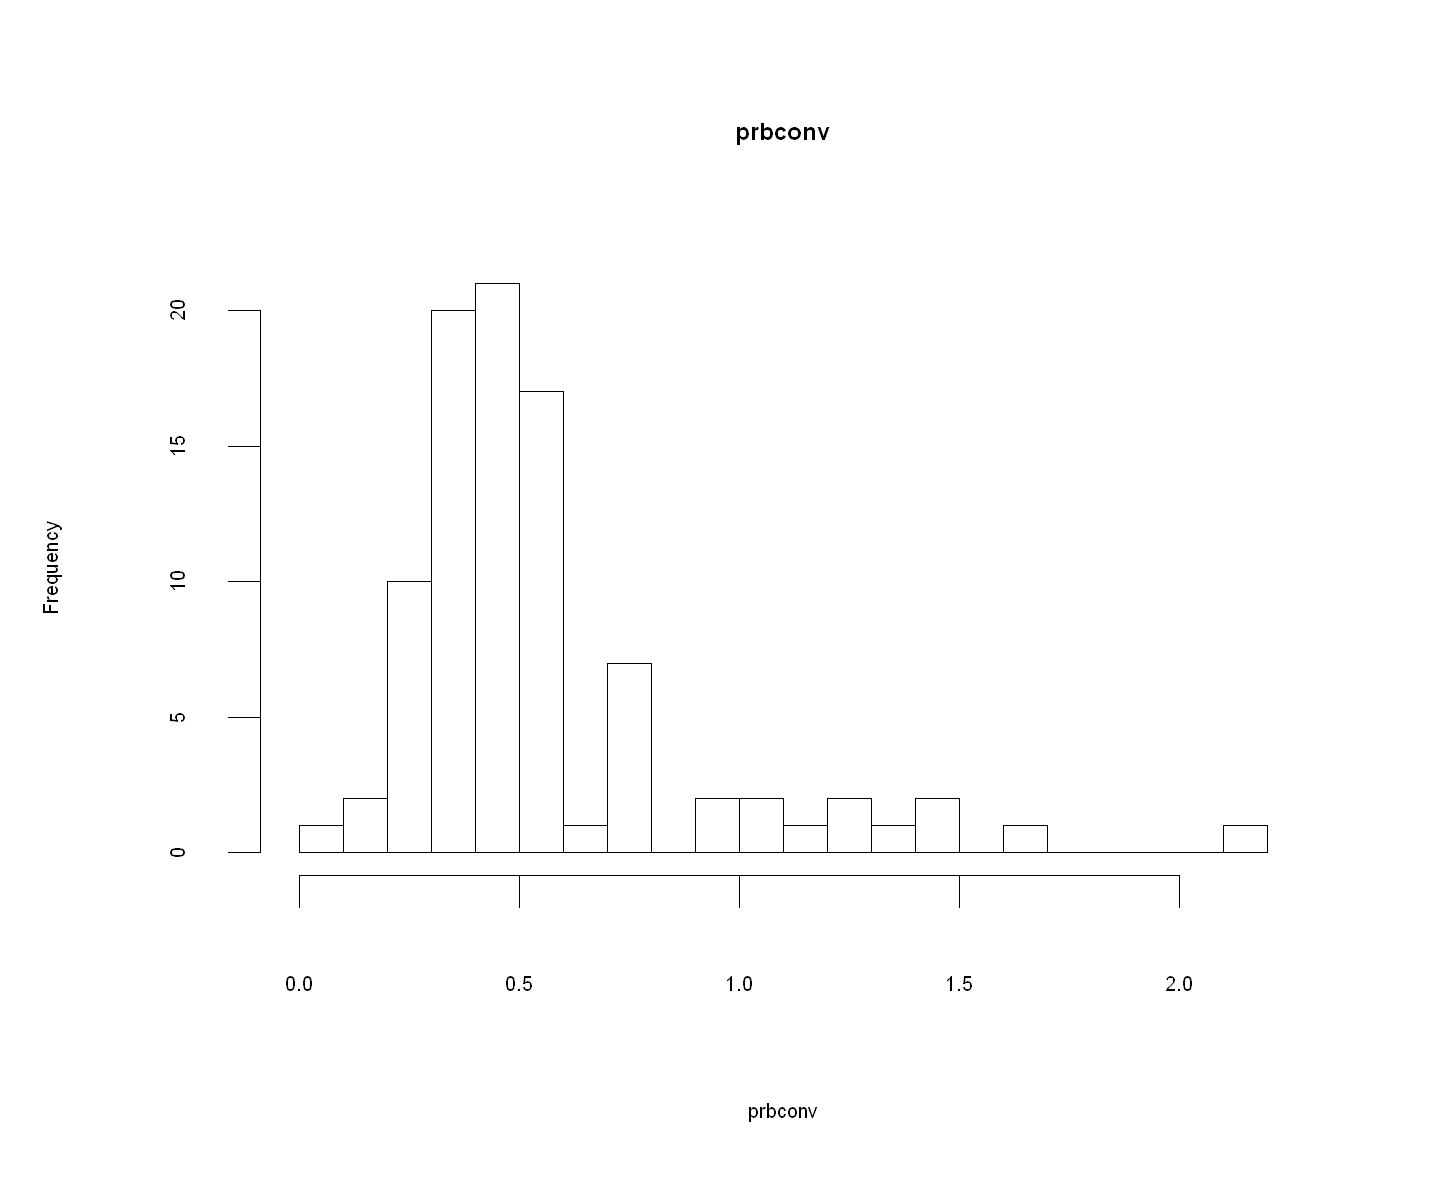

In [34]:
tail(data,11)
hist(data$prbconv, breaks=20, main="prbconv", xlab="prbconv")

With the import method modified, we are able to address the missing values and the special character error in the $prbconv$ data column

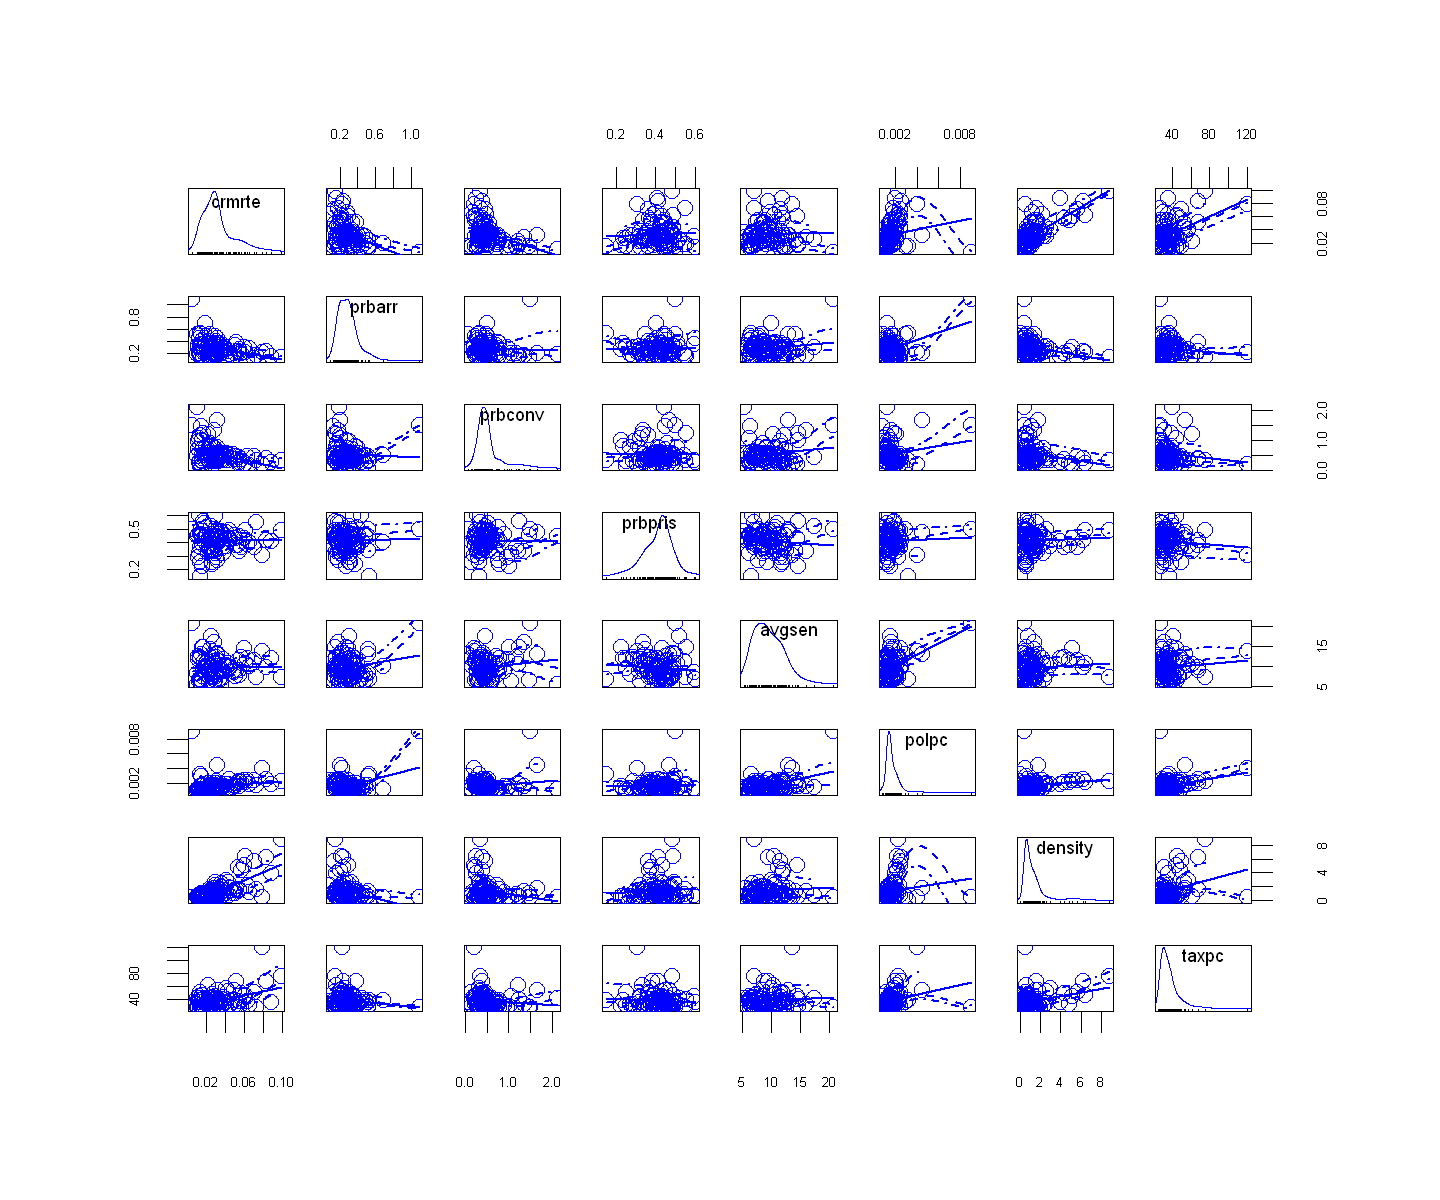

In [35]:
scatterplotMatrix(data[3:10])

### Data cleaning

1. 6 NA
2. take out year column
3. "prbarr" max > 1
4. "prbconv" strange characters and blank spaces; also the probability is bigger than 1
5. taxpc, what is the unit, what does it mean? Outlier at 119. Is the unit %?
6. pctmin80 data is too old
7. 15-23: different industry avg. wages
8. 24 mix: ratio of face-to-face crime
9. percentage young male (what is the age:15-24)


1. remove NA

In [8]:
data <- na.omit(data)
summary(data)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
    prbconv           prbpris           avgsen           polpc          
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.0007459  
 1st Qu.:0.34541   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.0012308  
 Median :0.45283   Median :0.4234   Median : 9.100   Median :0.0014853  
 Mean   :0.55128   Mean   :0.4108   Mean   : 9.647   Mean   :0.0017022  
 3rd Qu.:0.58886   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.0018768  
 Max.   :2.12121   Max.   :0.6000   Max.   :20.700   Max.   :0.0090543  
    density         

2. take out year column

In [9]:
data_clean <- subset(data,select=-c(year))
objects(data_clean)

[1] "avgsen"   "central"  "county"   "crmrte"   "density"  "mix"     
 [7] "pctmin80" "pctymle"  "polpc"    "prbarr"   "prbconv"  "prbpris" 
[13] "taxpc"    "urban"    "wcon"     "west"     "wfed"     "wfir"    
[19] "wloc"     "wmfg"     "wser"     "wsta"     "wtrd"     "wtuc"

3. "prbarr" max > 1

In [11]:
data_clean <- subset(data_clean,data_clean$prbarr <1)

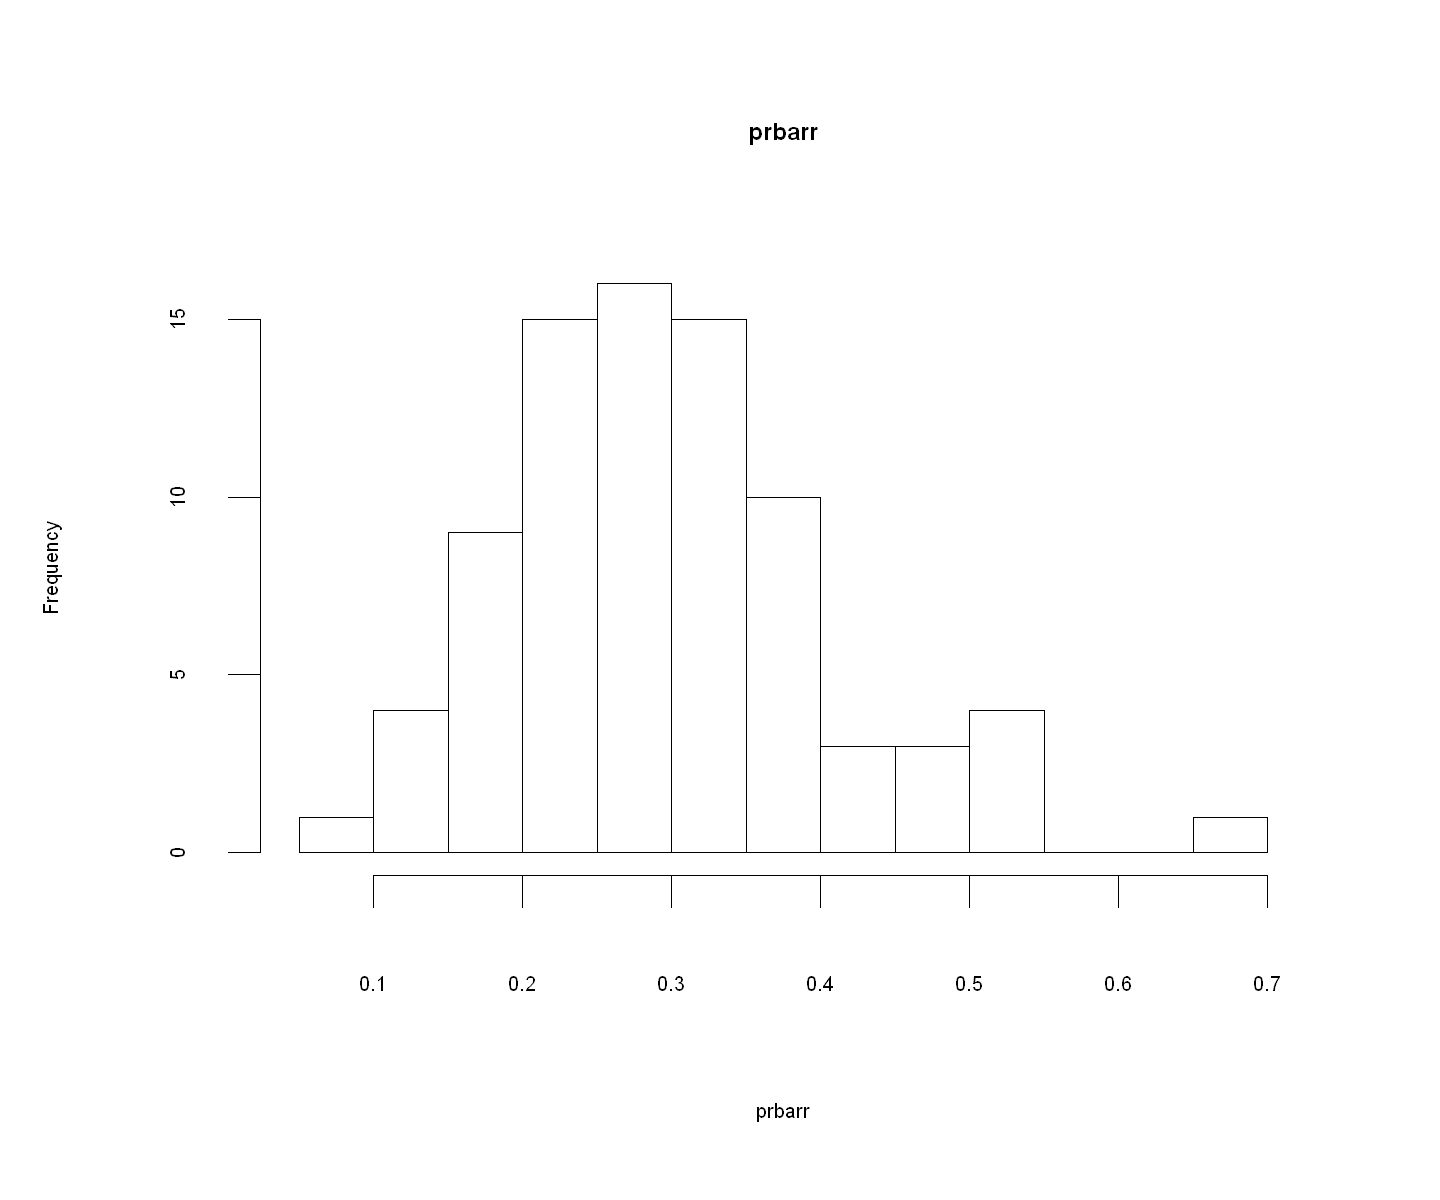

In [30]:
hist(data_clean$prbarr, breaks=20,  main="prbarr", xlab="prbarr")

4. "prbconv" strange characters and blank spaces; also the probability is bigger than 1 <br>
__this is taken care of in data import__


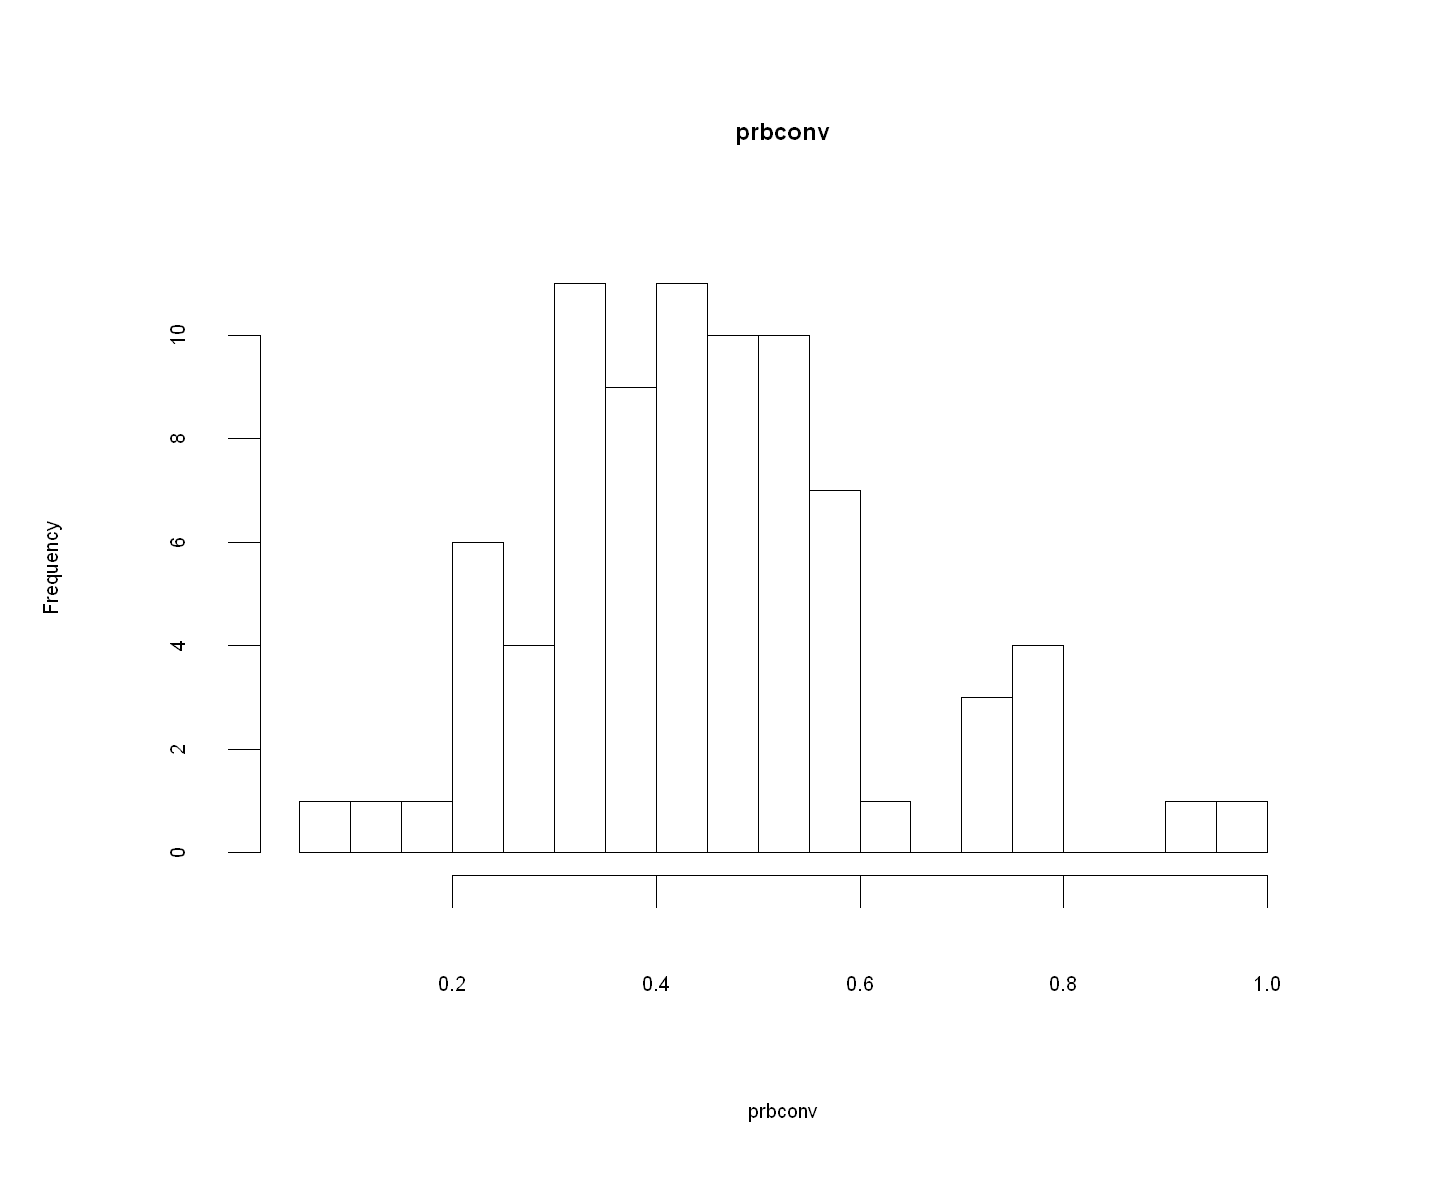

In [36]:
data_clean <- subset(data_clean,data_clean$prbconv <1)
hist(data_clean$prbconv, breaks=20, main="prbconv", xlab="prbconv")

5. taxpc: There seems to be some anomaly that is very far apart from other data points, but we have no evidence to say whether the data has anomaly or not. It could be an error or it could just be that the county has high tax per capita

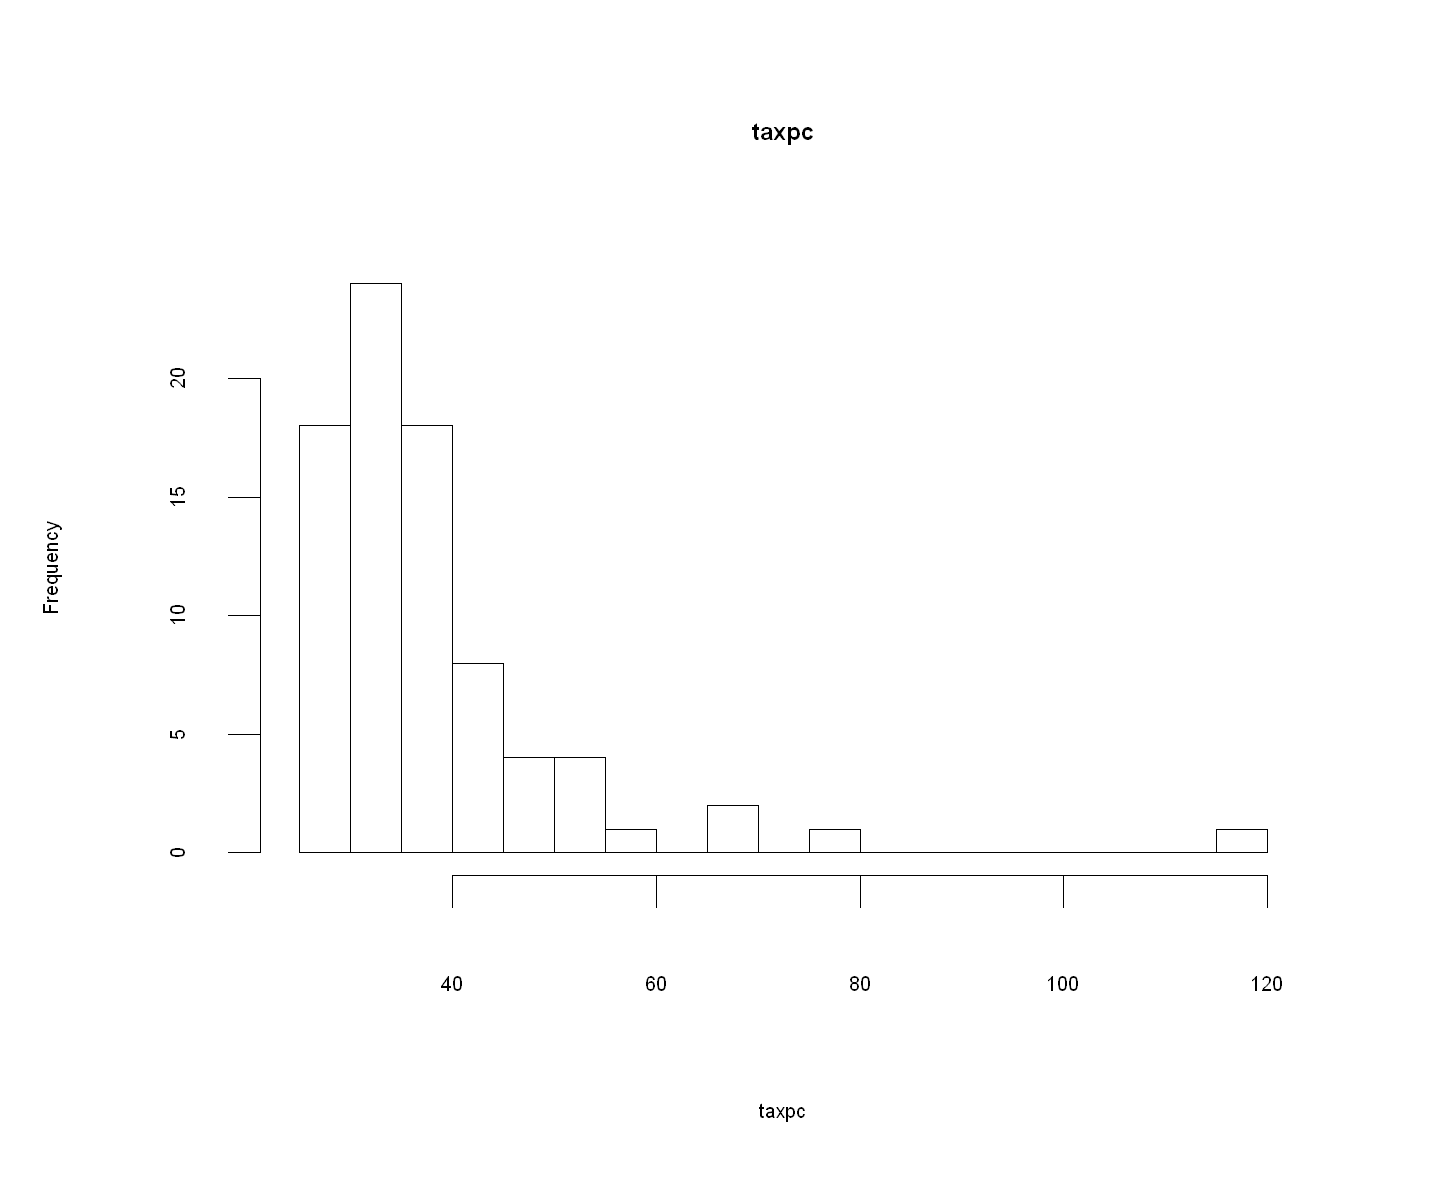

In [37]:
hist(data_clean$taxpc, breaks=20, main="taxpc", xlab="taxpc")

6. over-paid service industry: we found that the maximum value of the avg. weekly wage of service industry is above 2000, which is way more than the other industries. Based on the background knowledge, we don't believe there should be significant difference between the service industry and other industries in terms of compensation difference, and the data point above 2000 should be an error in the data, and we decided to remove them


In [60]:
data_clean <- subset(data_clean, data_clean$wser<1000)
summary(data_clean$wser)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  133.0   230.3   253.6   255.2   278.1   391.3 

### EDA

1. distribution of crimes committed per person

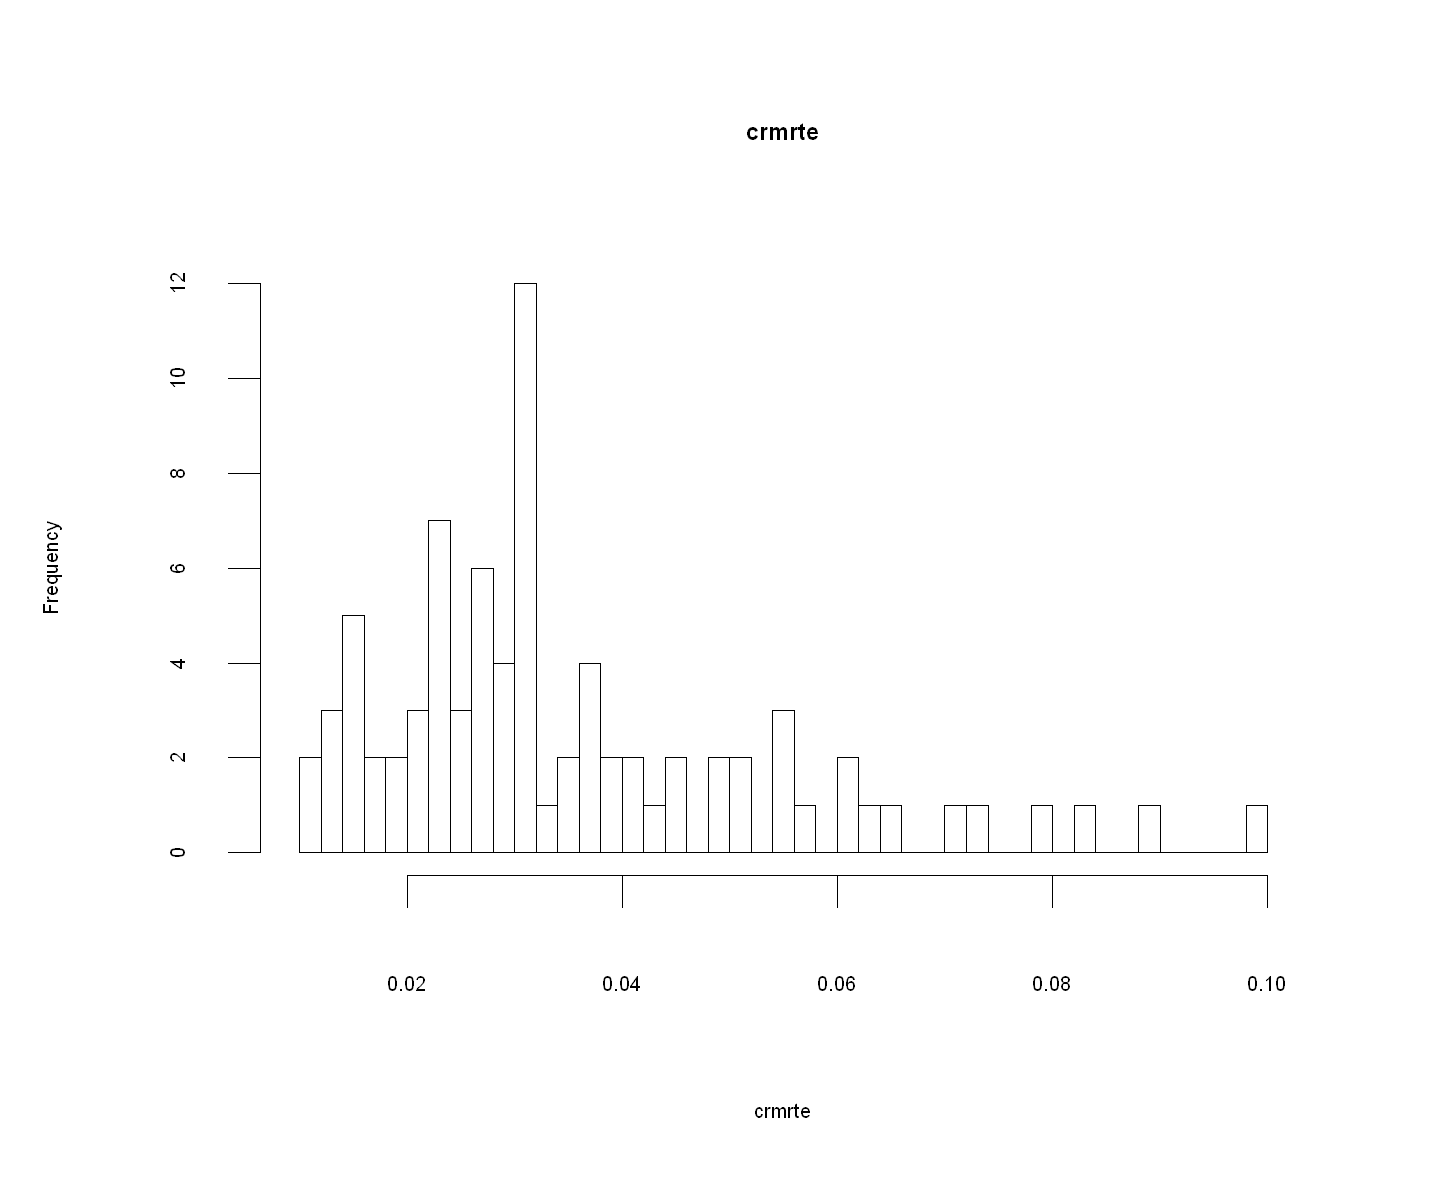

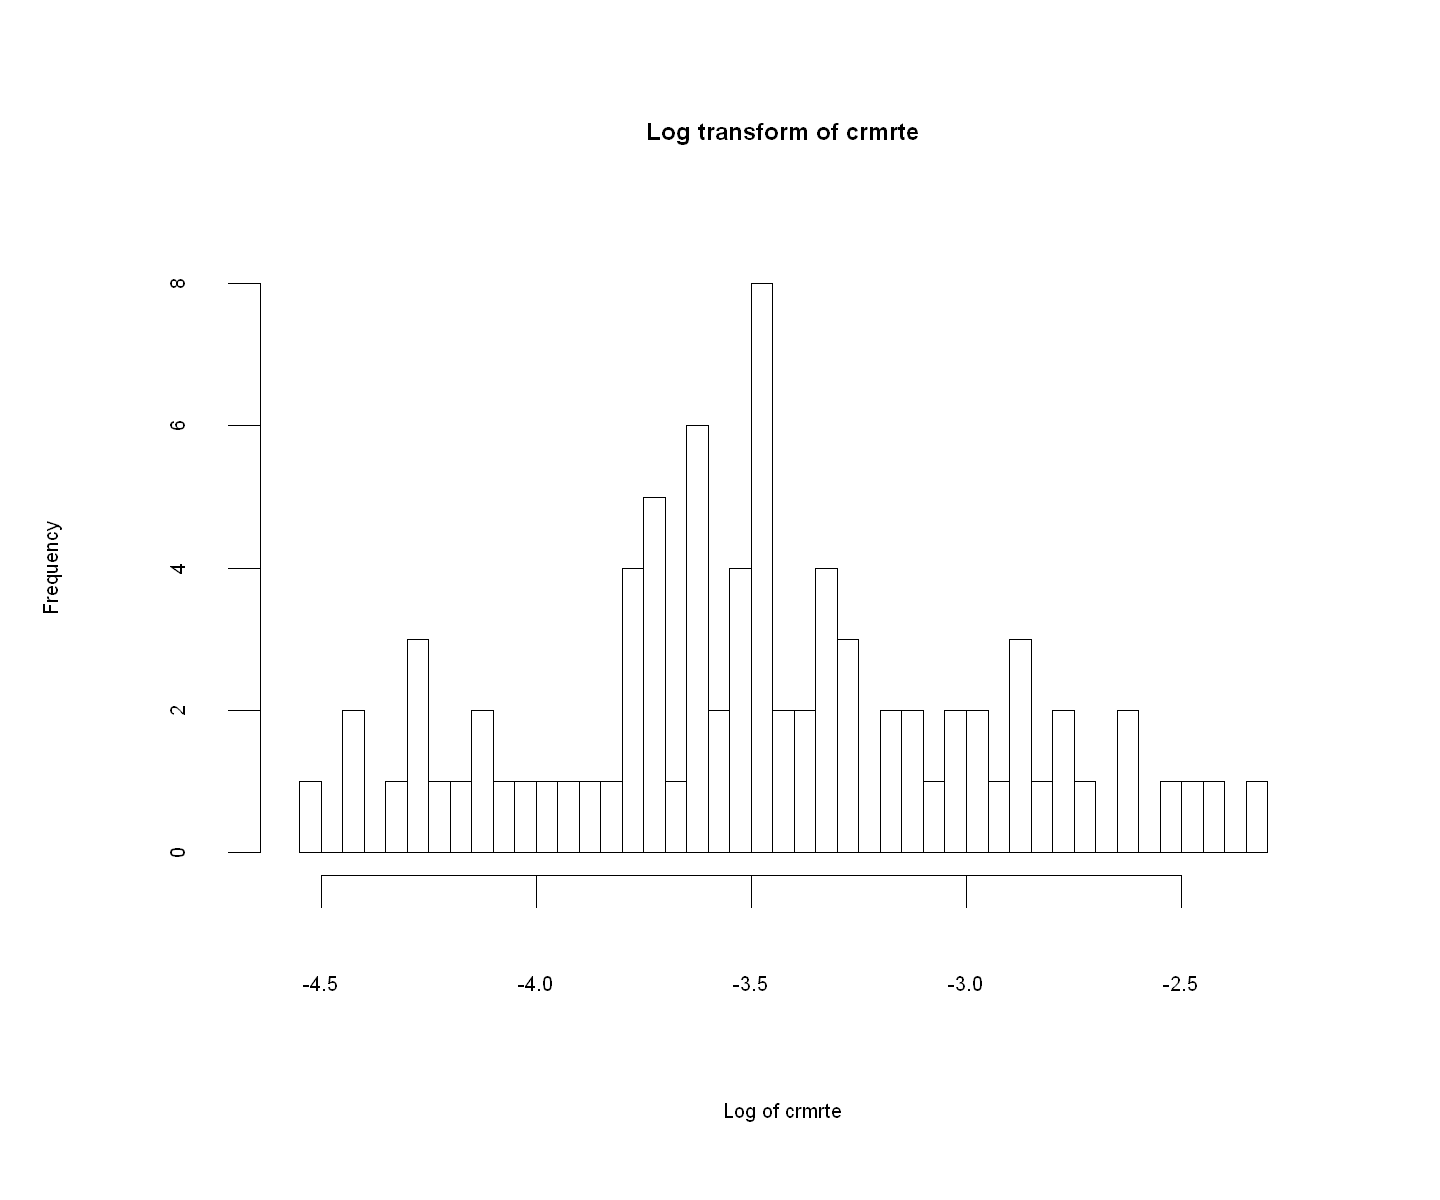

In [39]:
hist(data_clean$crmrte,breaks=50, main="crmrte", xlab="crmrte")
hist(log(data_clean$crmrte),breaks=50, main="Log transform of crmrte", xlab="Log of crmrte")

In [41]:
# install.packages("corrplot")

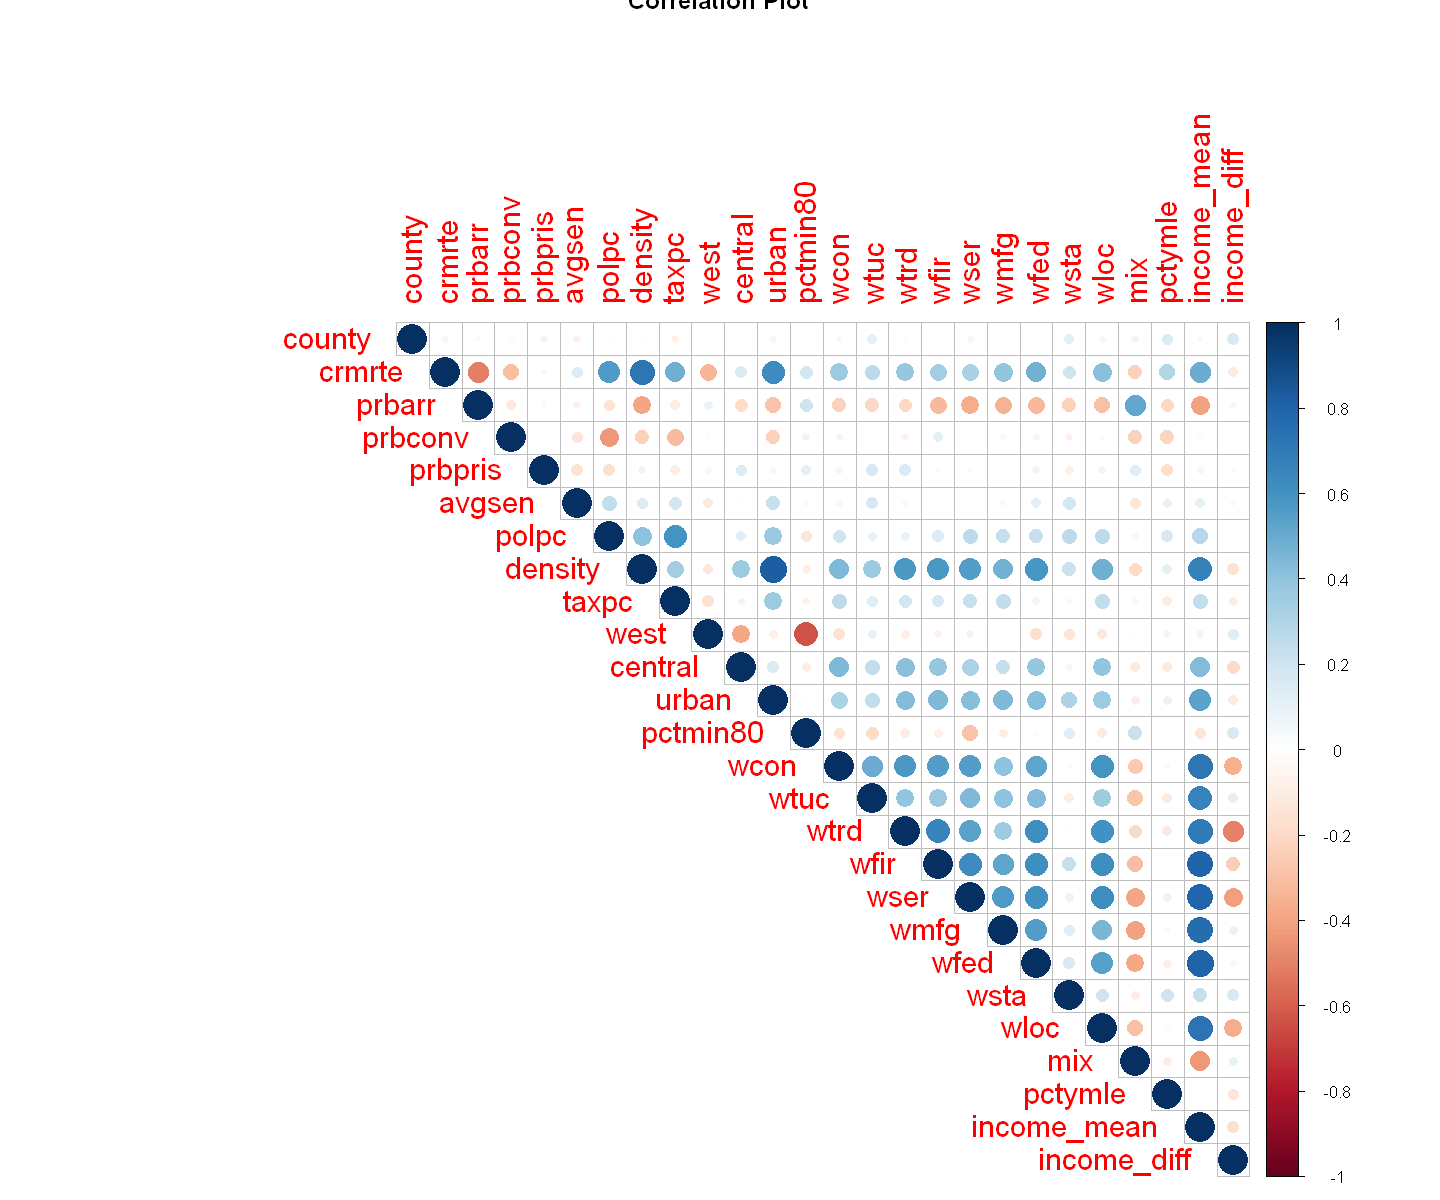

In [43]:
# correlation plot
library(corrplot)
corrplot(cor(data_clean[,sapply(data_clean,is.numeric)]),is.corr=T, method = "circle", type='upper',main = "Correlation Plot", tl.cex=1.5)

__Research Question__: <br>
How to reduce crime rate? <br>
1. sub-quest: how to reduce crime rate by increasing the arrest probability for non face-to-face crime

Logics:<br>
1. mix is positively correlated with prbarr
2. higher percentage of face-to-face crime positively correlates with higher prbarr
3. the percentage of non face-to-face crime is much higher


__model 1__: crmrte = $\beta_0 + \beta_1 * prbarr + \beta_2 * prbconv + \beta_3 * avgsen + \beta_4 * prbpris + u $ <br>

Based on the understanding of what each parameter stands for, we have chosen crmrte as the only dependent variable to use for our analysis. The variable is a direct indicator of average crime commited to North Carolina counties. To start with, we took a look at the distribution of the dataset

From the analysis of the EDA, the distribution of crmrte does not look particularly normal, but the log transformed crmrte looks much more normally distributed. To reduce the standard error in the model building process, we decided that in our model fitting, we are going to use the log transformed $crmrte$ as our dependent variable. <br>
That being said, we are creating another variable that indicates the log transformed $crmrte$

In [48]:
data_clean$crmrte_log <- log(data_clean$crmrte)

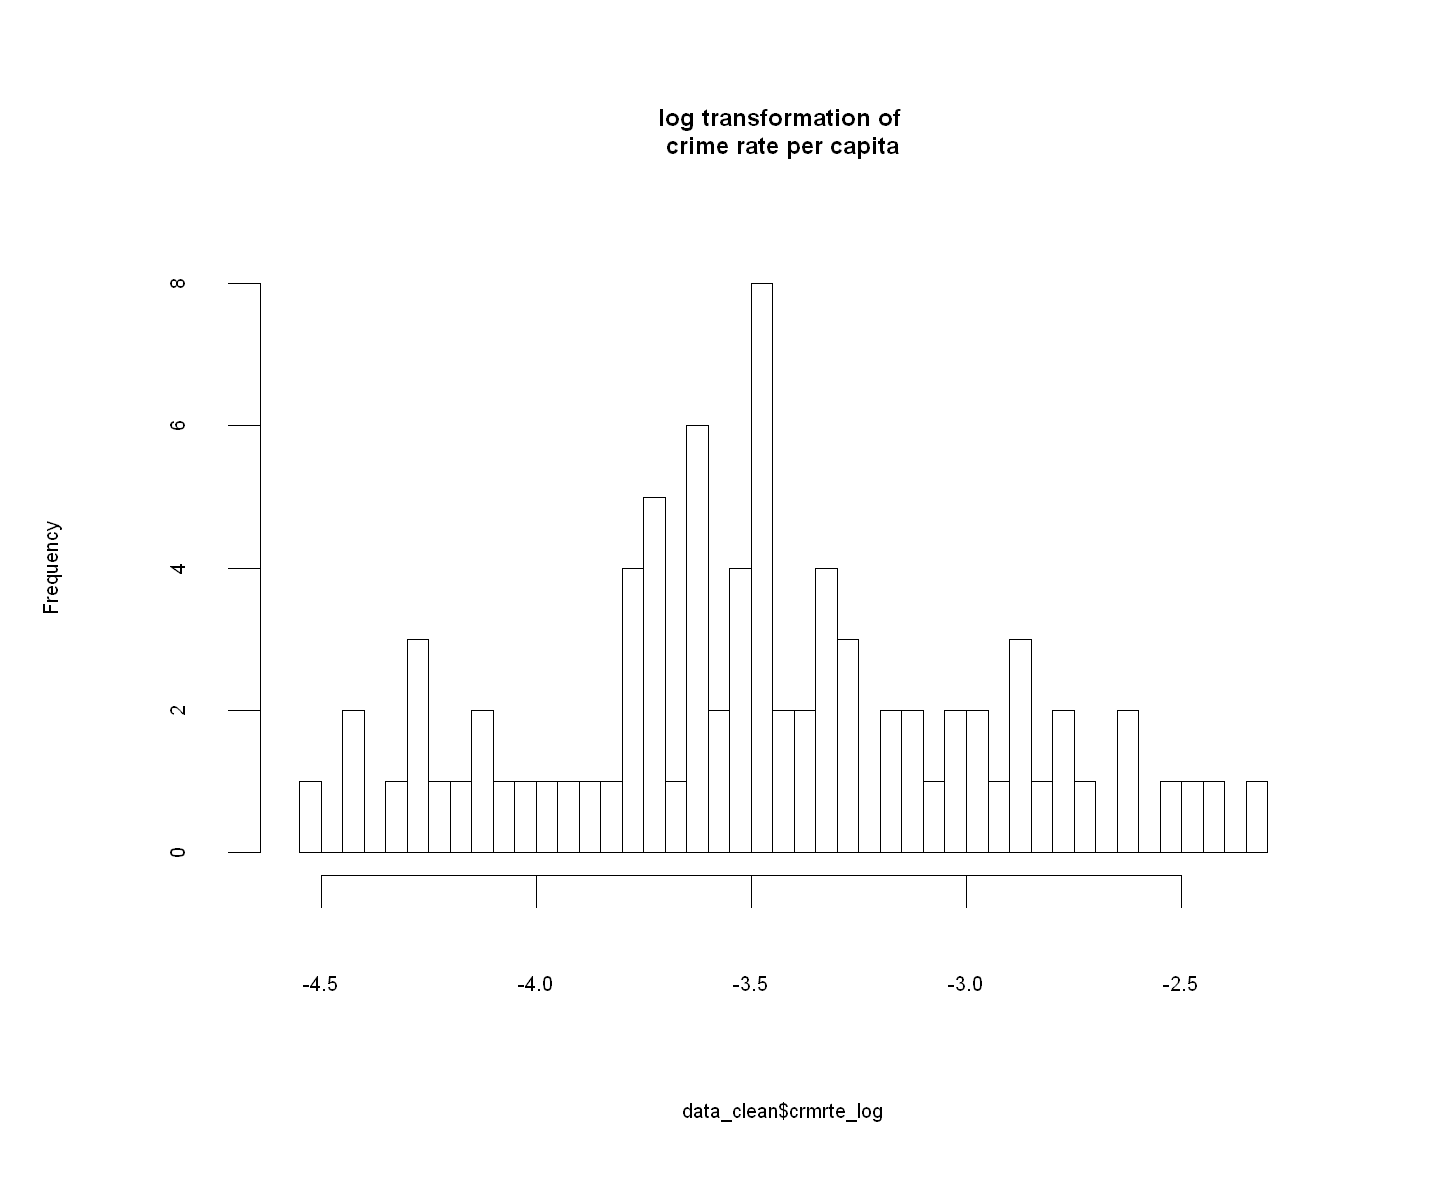

In [56]:
hist(data_clean$crmrte_log, breaks=50, main="log transformation of 
crime rate per capita")

Looking at the other variables, and the simple correlation plot in initial EDA, we are proposing the explanatory variables that we believe contribute to crime rate: <br>

1. prbarr: the probability of arrest should be a direct contributing factor to crime rate. In other words, if people who have potential to commit a crime believe the chance of them getting arrested is small, then it might encourage them to commit a crime
2. prbconv: after getting arrested, getting suspects convicted are the only way to let them take the punishment they deserve.
3. prbpris
4. avgsen: both probability of prison sentence reflect the severity of the punishment, which should directly impact the crime rate

With the above being proposed, we decided to take a look at the distribution of each explanatory variable:


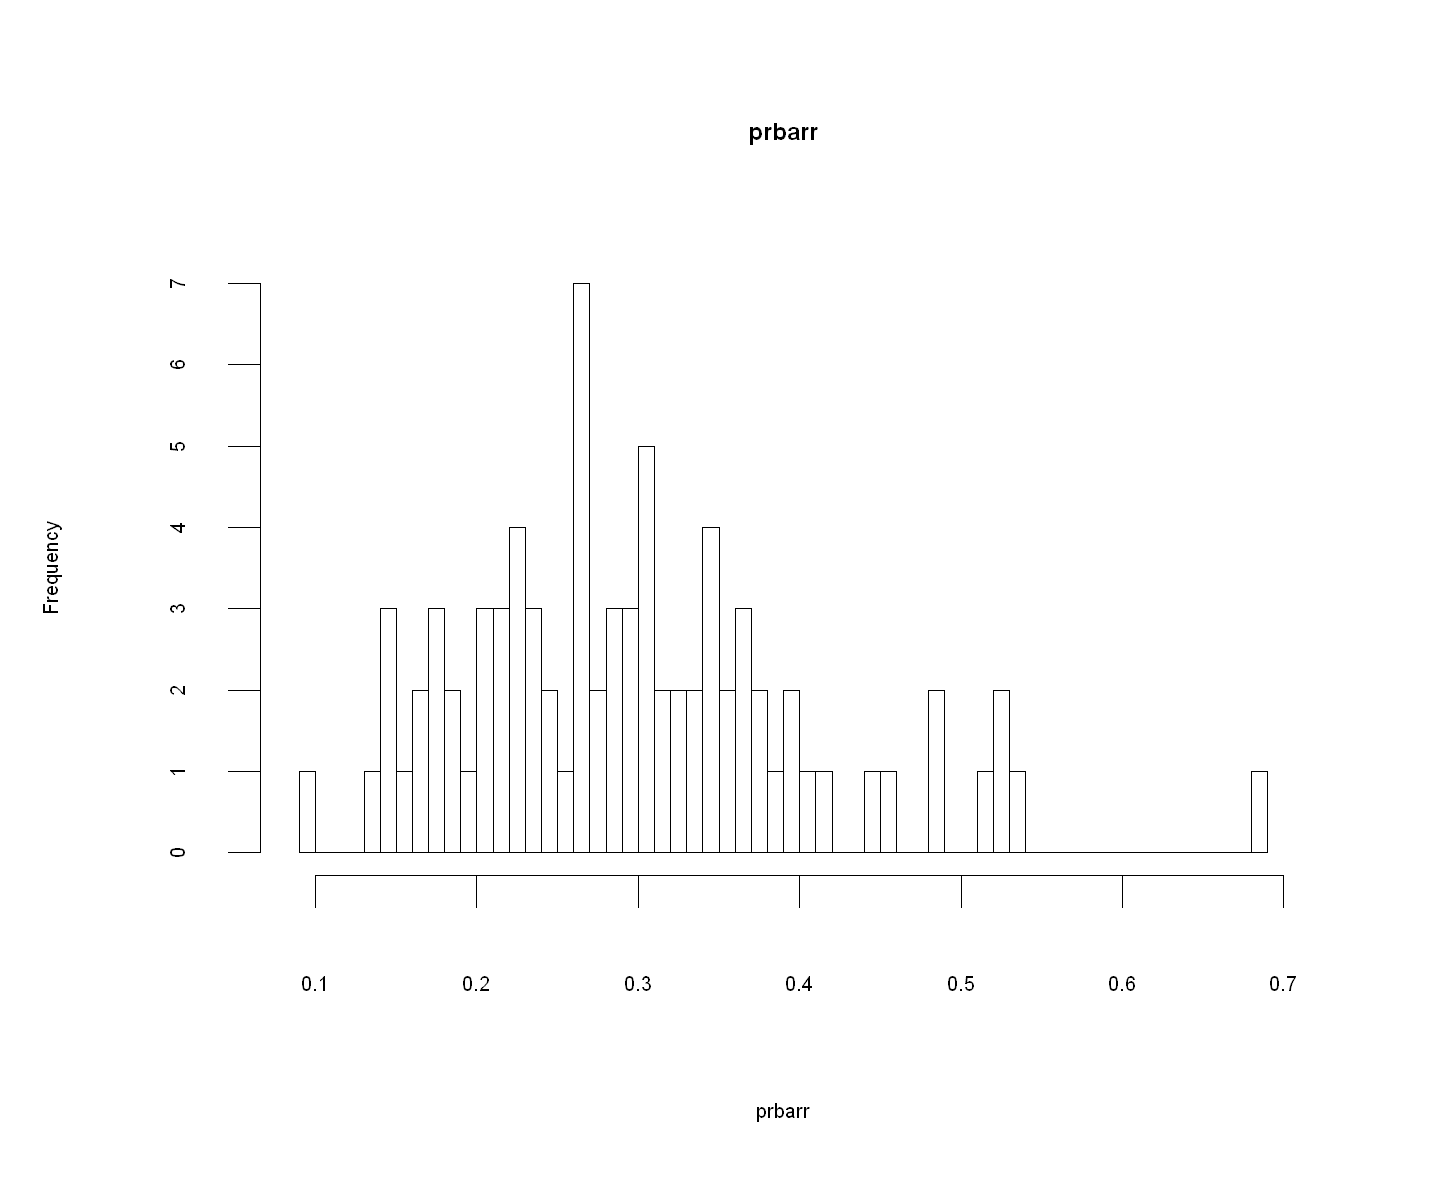

In [51]:
# prbarr
hist(data_clean$prbarr,breaks=50,main="prbarr", xlab="prbarr")

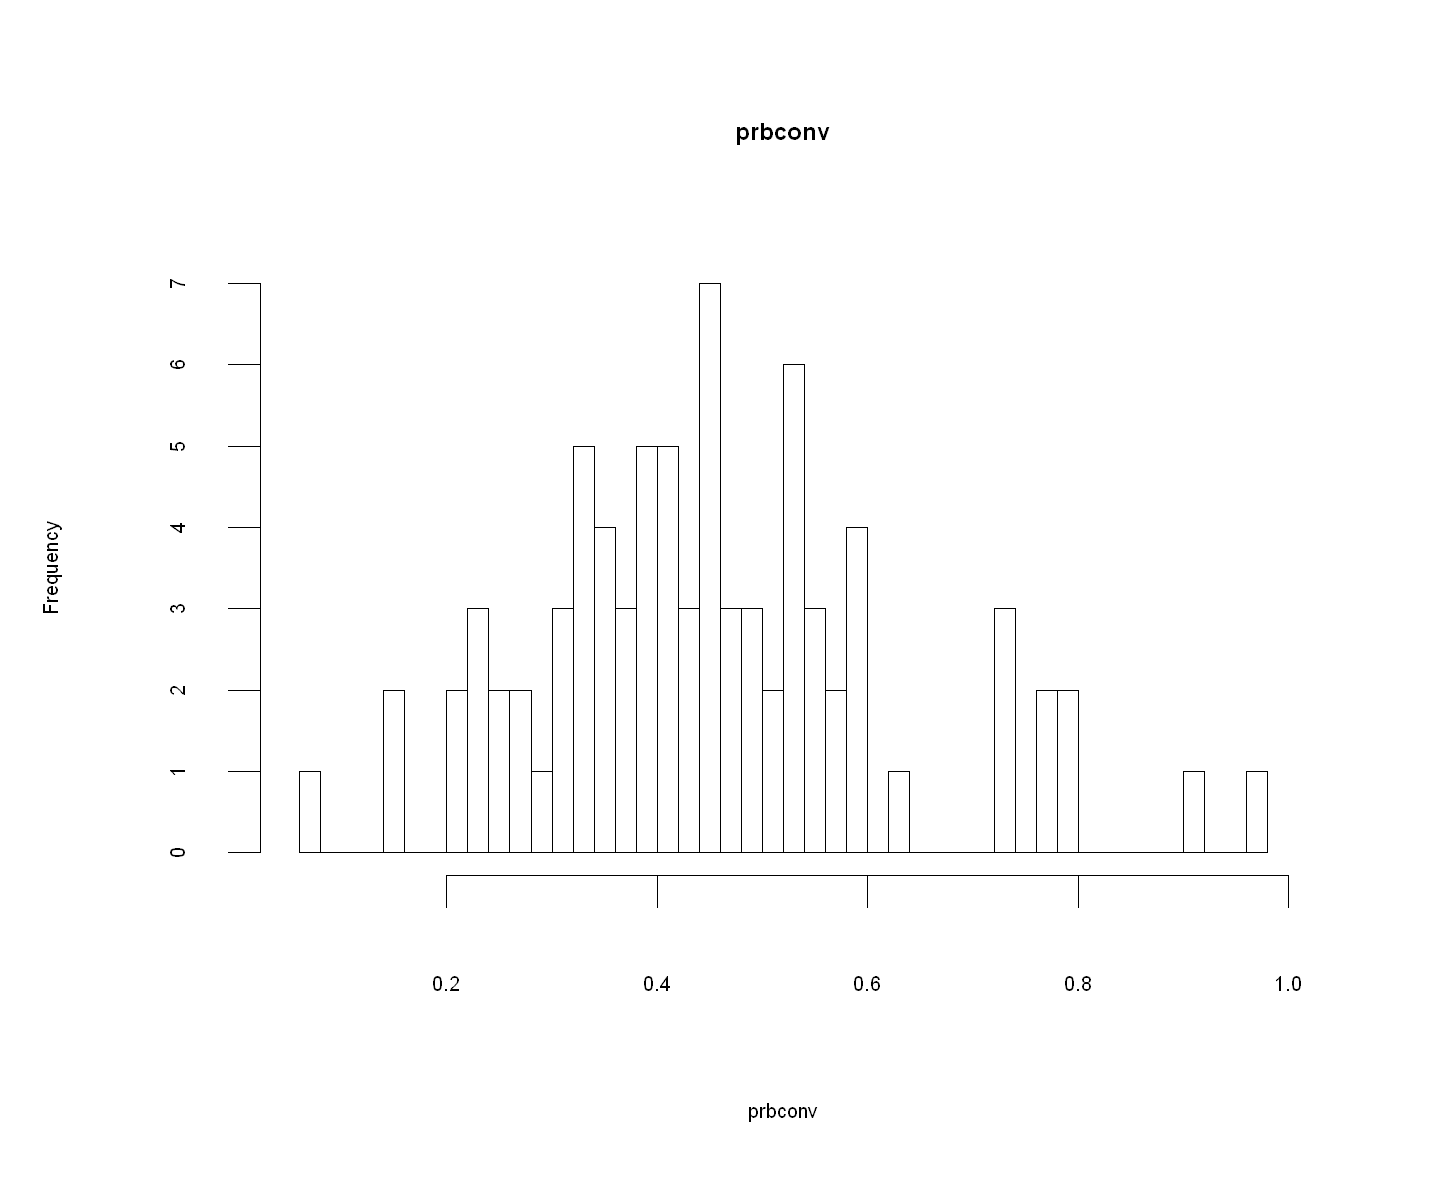

In [53]:
#prbconv
hist(data_clean$prbconv,breaks=50,main="prbconv", xlab="prbconv")

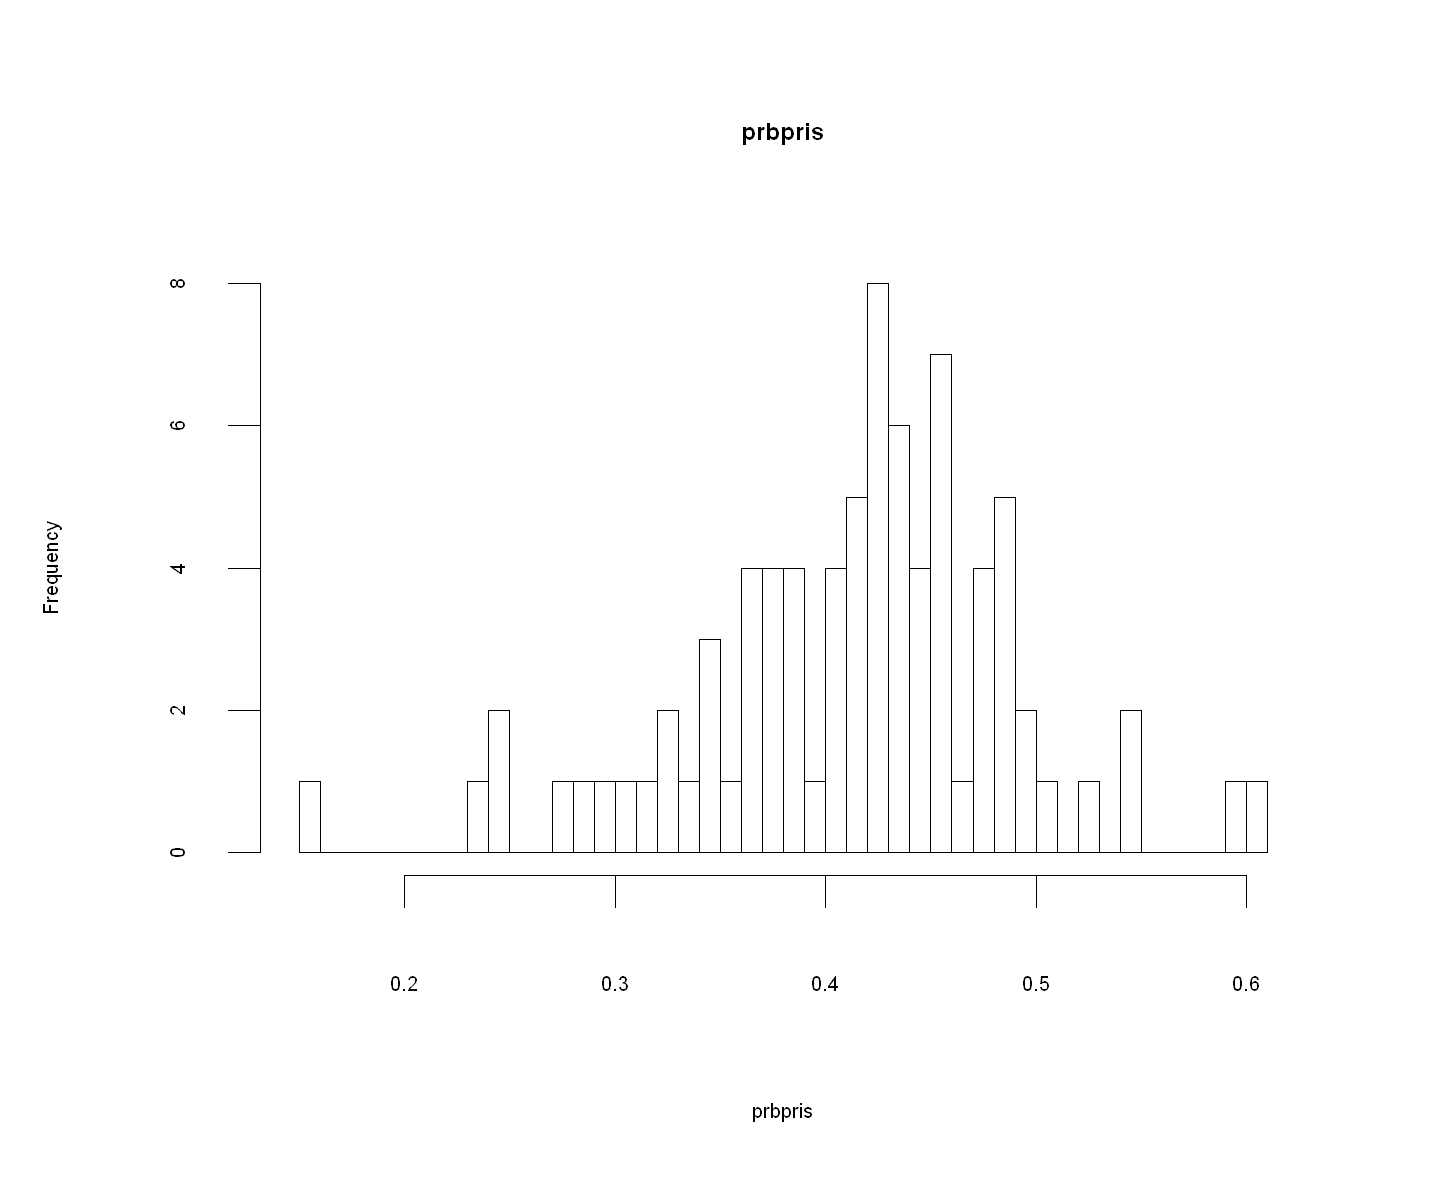

In [54]:
#prbpris
hist(data_clean$prbpris,breaks=50,main="prbpris", xlab="prbpris")


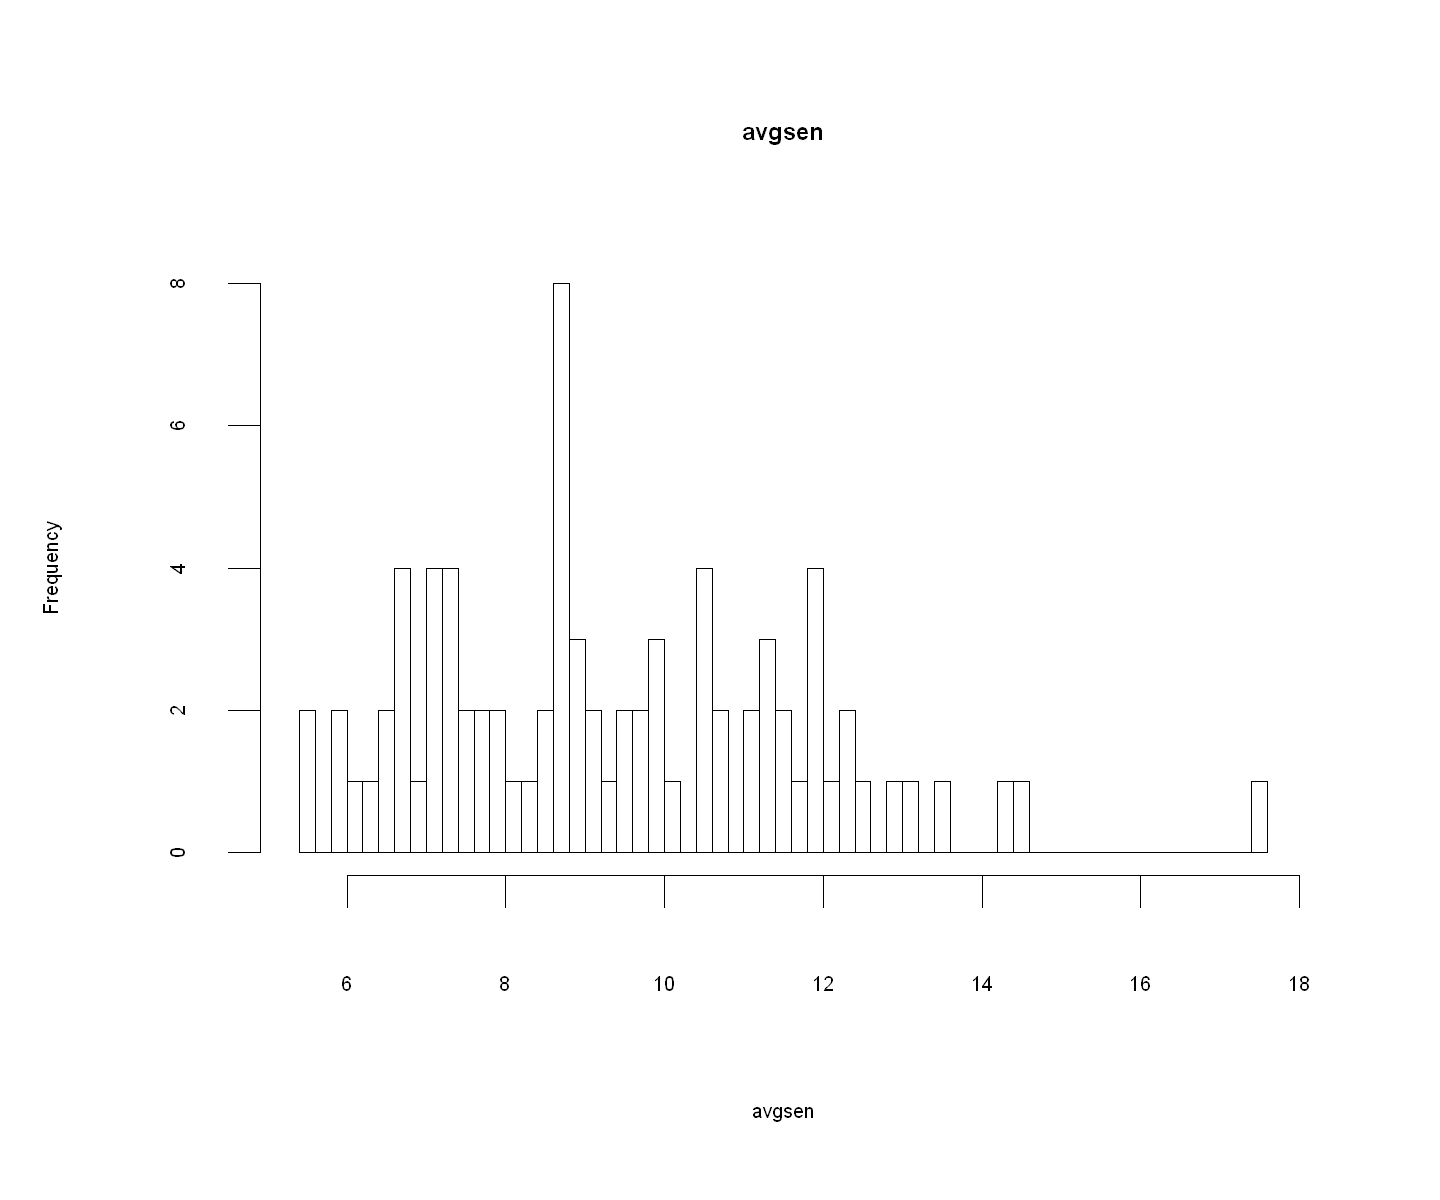

In [55]:
#avgsen
hist(data_clean$avgsen,breaks=50,main="avgsen", xlab="avgsen")


The above histograms of each explanatory variable all seem rather normally distributed, with some anomalies implied in $prbarr$ and $avgsen$. However, we don't think there is enough evidence to make a decision on whether the data is anomaly or not, and we will use the data for model building.

### Fitting model 1:

With the above explained reason, we are building the model1 with the explanatory variable of key interest as below:<br>
crmrte_log = $\beta_0 + \beta_1 * prbarr + \beta_2 * prbconv + \beta_3 * avgsen + \beta_4 * prbpris + u $ 

In [58]:
model1 <- lm(crmrte_log ~ prbarr + prbconv + avgsen + prbpris, data=data_clean)

In [62]:
model1


Call:
lm(formula = crmrte_log ~ prbarr + prbconv + avgsen + prbpris, 
    data = data_clean)

Coefficients:
(Intercept)       prbarr      prbconv       avgsen      prbpris  
  -2.384761    -2.626160    -0.961712     0.009033     0.100288  
